In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/countries_non_pop.csv');

In [2]:
years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']

In [3]:
df_canada = df[df['Country Name'].str.contains("Canada")]
df_japan = df[df['Country Name'].str.contains("Japan")]

In [4]:
# Canada Birth & Death Rate
can_birth_rate = df_canada[df_canada['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
can_death_rate = df_canada[df_canada['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
can_birth_rate.columns = ['Birth Rate']
can_death_rate.columns = ['Death Rate']
can_birth_rate.index.name = 'Year'
can_death_rate.index.name = 'Year'
can_combined_bdr_data = can_birth_rate.join(can_death_rate)
can_combined_bdr_data.index = can_combined_bdr_data.index
can_bdr_filtered_data = can_combined_bdr_data[can_combined_bdr_data.index.astype(int) % 5 == 0]

In [12]:
# Japan Birth & Death Rate
jpn_birth_rate = df_japan[df_japan['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
jpn_death_rate = df_japan[df_japan['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
jpn_birth_rate.columns = ['Birth Rate']
jpn_death_rate.columns = ['Death Rate']
jpn_birth_rate.index.name = 'Year'
jpn_death_rate.index.name = 'Year'
jpn_combined_bdr_data = jpn_birth_rate.join(jpn_death_rate)
jpn_combined_bdr_data.index = jpn_combined_bdr_data.index
jpn_bdr_filtered_data = jpn_combined_bdr_data[jpn_combined_bdr_data.index.astype(int) % 5 == 0]

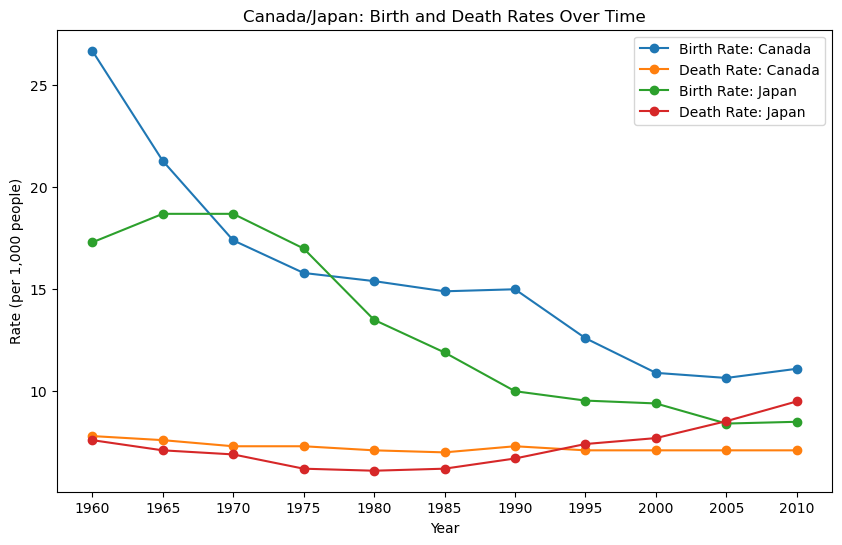

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(can_bdr_filtered_data['Birth Rate'], marker='o', label='Birth Rate: Canada')
plt.plot(can_bdr_filtered_data['Death Rate'], marker='o', label='Death Rate: Canada')
plt.plot(jpn_bdr_filtered_data['Birth Rate'], marker='o', label='Birth Rate: Japan')
plt.plot(jpn_bdr_filtered_data['Death Rate'], marker='o', label='Death Rate: Japan')
plt.title('Canada/Japan: Birth and Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (per 1,000 people)')
plt.legend()
plt.show()

In [6]:
can_life_expectancy_f_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, female (years)'].iloc[:, 5:].T
can_life_expectancy_m_df = df_canada[df_canada['Indicator Name'] == 'Life expectancy at birth, male (years)'].iloc[:, 5:].T
can_life_expectancy_f_df.columns = ['Female Life Expectancy at Birth']
can_life_expectancy_m_df.columns = ['Male Life Expectancy at Birth']
can_life_expectancy_f_df.index.name = 'Years'
can_life_expectancy_m_df.index.name = 'Years'

can_combined_le_data = can_life_expectancy_f_df.join(can_life_expectancy_m_df)
can_combined_le_data.index = can_combined_le_data.index
can_filtered_le_data = can_combined_le_data[can_combined_le_data.index.astype(int) % 5 == 0]

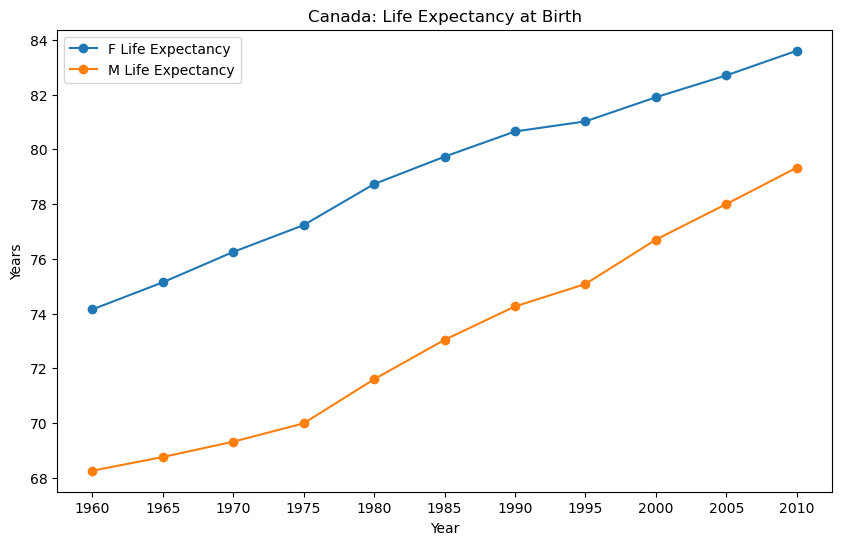

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(can_filtered_le_data['Female Life Expectancy at Birth'], marker='o', label='F Life Expectancy')
plt.plot(can_filtered_le_data['Male Life Expectancy at Birth'], marker='o', label='M Life Expectancy')
plt.title('Canada: Life Expectancy at Birth')
plt.xlabel('Year')
plt.ylabel('Years')
plt.legend()
plt.show()

In [8]:
can_survival_65_f_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, female (% of cohort)"].iloc[:, 5:].T
can_survival_65_m_df = df_canada[df_canada['Indicator Name'] == "Survival to age 65, male (% of cohort)"].iloc[:, 5:].T
can_survival_65_f_df.columns = ['% of Females to reach age 65']
can_survival_65_m_df.columns = ['% of Males to reach age 65']
can_survival_65_f_df.index.name = 'Percent'
can_survival_65_f_df.index.name = 'Percent'

can_combined_65_data = can_survival_65_f_df.join(can_survival_65_m_df)
can_combined_65_data.index = can_combined_65_data.index
can_filtered_65_data = can_combined_65_data[can_combined_65_data.index.astype(int) % 5 == 0]

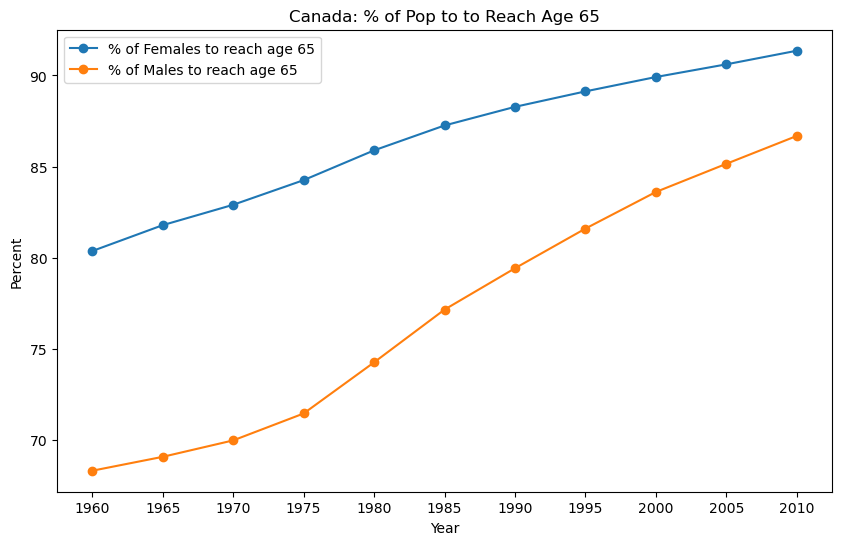

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(can_filtered_65_data['% of Females to reach age 65'], marker='o', label='% of Females to reach age 65')
plt.plot(can_filtered_65_data['% of Males to reach age 65'], marker='o', label='% of Males to reach age 65')
plt.title('Canada: % of Pop to to Reach Age 65')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.legend()
plt.show()

In [10]:
can_combined_65_le_data = can_filtered_le_data.join(can_filtered_65_data)

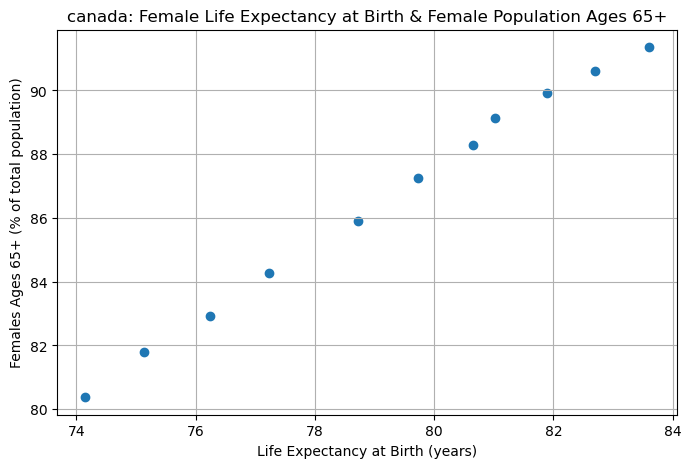

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(can_combined_65_le_data['Female Life Expectancy at Birth'], can_combined_65_le_data['% of Females to reach age 65'], marker='o')
plt.title('Canada: Female Life Expectancy at Birth & Female Population Ages 65+')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('Females Ages 65+ (% of total population)')
plt.grid(True)
plt.show()